---
## Note from the Teachers:
We added a header with information about your project. 
This is useful since we want to keep a database of all the cool projects participants have made during the courses.
We will save the code in our database and host on github a page to show all the projects. Therefore it is more practical to add some information in the header of each notebook.
Thanks a lot for the understanding and for taking care of it.

You can delete this cell if you want

---

# Project Name (replace with your project name)

> Indented block


Project description (replace with your project description, you can use the same from the `INFO.md` file.

### Project Repo 
link (replace if you have your own repo, otherwise delete)

## Participants:
Please list here all the participants alongside with any information you may want to be visible. This will be hosted on a opencampus.sh repository, so if you want to keep a connection to your github user include this information here. 

### Course and Semester
Add here in which course and in which semester it was done.

### License
If you are releasing the software under some certain license, you can mention it and also include the `LICENSE.md` file in the folder

---

### Colab Setup

In [5]:
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("We're running Colab")

if IN_COLAB:
  # Mount the Google Drive at mount
  mount='/content/drive'
  print("Colab: mounting Google drive on ", mount)

  drive.mount(mount)

  # Switch to the directory on the Google Drive that you want to use
  import os
  drive_root = mount + "/My Drive/Colab Notebooks/Signal_Denoising_GAN_Project_WS22"
  
  # Create drive_root if it doesn't exist
  create_drive_root = True
  if create_drive_root:
    print("\nColab: making sure ", drive_root, " exists.")
    os.makedirs(drive_root, exist_ok=True)
  
  # Change to the directory
  print("\nColab: Changing directory to ", drive_root)
  %cd $drive_root
  !pwd

  !pip install -r requirements.txt
  !sudo apt-get install nano
  !cp -f ./resources/cws.py /usr/local/lib/python3.8/dist-packages/scaleogram

  from IPython.display import JSON
  from google.colab import output
  from subprocess import getoutput
  import os
  
  #@See jQuery Terminal's [Features](https://terminal.jcubic.pl/)

  def shell(command):
    if command.startswith('cd'):
      path = command.strip().split(maxsplit=1)[1]
      os.chdir(path)
      return JSON([''])
    return JSON([getoutput(command)])
  output.register_callback('shell', shell)


 

  

#@title Colab Shell
%%html
<div id=term_demo></div>
<script src="https://code.jquery.com/jquery-latest.js"></script>
<script src="https://cdn.jsdelivr.net/npm/jquery.terminal/js/jquery.terminal.min.js"></script>
<link href="https://cdn.jsdelivr.net/npm/jquery.terminal/css/jquery.terminal.min.css" rel="stylesheet"/>
<script>
$('#term_demo').terminal(async function(command) {
    if (command !== '') {
        try {
            let res = await google.colab.kernel.invokeFunction('shell', [command])
            let out = res.data['application/json'][0]
            this.echo(new String(out))
        } catch(e) {
            this.error(new String(e));
        }
    } else {
        this.echo('');
    }
}, {
    greetings: 'Welcome to Colab Shell',
    name: 'colab_demo',
    height: 250,
    prompt: 'colab > '
});

\$cd /usr/local/lib/python3.8/dist-packages/scaleogram
$nano cws.py

Correcting this error is easy, we can access to the cws.py in the package, and find this dictionary : COI_DEFAULTS = { 'alpha': '0.5', 'hatch':'/', } , then change '0.5' to 0.5, now the problem is resolved

This is example code for the bakery data. You DO NOT need to use this.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns


In [7]:
if IN_COLAB:
  DATASET_FOLDER = './data/dataset/'
  DATA_FOLDER = './data/'
else:
  DATASET_FOLDER = './../data/dataset/'
  DATA_FOLDER = './../data/'



### Import Essential Libraries

In [35]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib
from scipy import signal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer, RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from numpy import genfromtxt
from tqdm.notebook import tqdm_notebook
from sklearn.model_selection import train_test_split
import pylab as pl
import seaborn as sns
from pathlib import Path
import shutil

### Import essential Tensorflow - Keras libraries

In [36]:
import tensorflow.keras.backend as K
import tensorflow_addons as tfa
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, load_model, Model

if IN_COLAB:
  from tensorflow.keras.optimizers.legacy import RMSprop,Adam,SGD,Adadelta,Adagrad,Adamax
else:
  from tensorflow.keras.optimizers import RMSprop,Adam,SGD,Adadelta,Adagrad,Adamax

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from tensorflow.compat.v1.keras.backend import set_session
from tensorflow.keras.utils import plot_model, to_categorical, normalize
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()


### Check for available GPUs and configure Tensorflow session to utilize GPU

In [37]:
try:
  # tf.debugging.experimental.enable_dump_debug_info('.', tensor_debug_mode="FULL_HEALTH", circular_buffer_size=-1)
  # tf.debugging.set_log_device_placement(True)
  from tensorflow.python.client import device_lib

  device_name = tf.test.gpu_device_name()
  if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
  print('Found GPU at: {}'.format(device_name))

  config = tf.compat.v1.ConfigProto()
  config.gpu_options.allow_growth = True
  config.gpu_options.per_process_gpu_memory_fraction = 0.1
  sess = tf.compat.v1.InteractiveSession(config=config)
  set_session(sess)
  print(device_lib.list_local_devices())
  gpus = tf.config.experimental.list_physical_devices('GPU')
  for gpu in gpus:
    try:
      tf.config.experimental.set_memory_growth(gpu, True)
      # Restrict TensorFlow to only use the first GPU
      tf.config.set_visible_devices(gpus[0], 'GPU')
      logical_gpus = tf.config.list_logical_devices('GPU')
      print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
      # Visible devices must be set before GPUs have been initialized
      print(e)

except Exception as error:
    print("Error trying to configure computing device.")
    print(error)

Found GPU at: /device:GPU:0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17006785195417501293
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4716494848
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16021327265432392170
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]
1 Physical GPUs, 1 Logical GPU


2023-01-02 03:19:24.360807: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-02 03:19:24.769465: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-02 03:19:24.784869: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-02 03:19:24.785395: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have be

### Version Check: Tensorflow - Cuda - CuDNN 

In [38]:
from tensorflow.python.platform import build_info as tf_build_info
print("Tensorflow verison: ",tf.__version__)
print("CUDA verison: ", tf_build_info.build_info['cuda_version'])
print("CUDNN verison: ", tf_build_info.build_info['cudnn_version'])

Tensorflow verison:  2.10.0
CUDA verison:  11.8
CUDNN verison:  8


### Setup Tensorflow-GPU precision 
Mixed precision is the use of both 16-bit and 32-bit floating-point types in a model during training to make it run faster and use less memory. 

In [39]:
# tf.keras.backend.floatx()
# tf.keras.backend.set_floatx('float16')
# tf.keras.mixed_precision.experimental.set_policy('mixed_float16')
tf.keras.backend.floatx()

'float32'

### Import CSV Data with Pandas

In [40]:
file = os.path.join(DATASET_FOLDER, 'combined_dataset.csv')
# df.set_index(pd.to_datetime(df['Date'])).drop(['Date'], axis=1).asfreq(freq='D')
# df.set_index(pd.to_datetime(df['Date'])).asfreq(freq='D')


myData = pd.read_csv(file, delimiter=',')
# myData.round(decimals=6)
# myData=myData.astype(np.float32)
# myData=myData.astype(np.float16)
myData.describe()

,G1_Sales,G2_Sales,G3_Sales,G4_Sales,G5_Sales,G6_Sales,Cloudiness,Temperature,Wind Speed,Weather Code,KielerWoche
count,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000
mean,121.609685,390.338363,160.825879,83.507887,272.267911,10.821912,4.664044,11.825403,10.978714,27.353540,0.020824
std,44.238232,147.255653,78.134143,38.186990,105.985502,27.823203,2.685187,7.190157,4.241387,28.144402,0.142827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.475000,0.000000,0.000000,0.000000
25%,96.074649,281.658152,104.946089,64.441067,228.600351,0.000000,2.000000,6.125000,8.000000,0.000000,0.000000
50%,121.022931,363.882395,142.385020,78.565833,266.290327,0.000000,6.000000,11.375000,10.000000,20.000000,0.000000
75%,146.289692,482.354587,201.424733,96.534913,308.207385,0.000000,7.000000,17.650000,13.000000,61.000000,0.000000
max,416.788764,1203.431130,565.941679,430.500089,1879.461831,172.865985,8.000000,32.671428,35.000000,95.000000,1.000000


### Check Datatypes

In [41]:
# myData.convert_dtypes('float16')
myData.dtypes

Date             object
G1_Sales        float64
G2_Sales        float64
G3_Sales        float64
G4_Sales        float64
G5_Sales        float64
G6_Sales        float64
Cloudiness      float64
Temperature     float64
Wind Speed      float64
Weather Code    float64
KielerWoche     float64
dtype: object

### Check Shape of DataFrame

In [42]:
myData.shape

(2161, 12)

### List of features or signals used in the data-set.

In [43]:
data_top = myData.columns.values
data_top

array(['Date', 'G1_Sales', 'G2_Sales', 'G3_Sales', 'G4_Sales', 'G5_Sales',
       'G6_Sales', 'Cloudiness', 'Temperature', 'Wind Speed',
       'Weather Code', 'KielerWoche'], dtype=object)

### Display top rows of the DataFrame

In [44]:
myData.head()

,Date,G1_Sales,G2_Sales,G3_Sales,G4_Sales,G5_Sales,G6_Sales,Cloudiness,Temperature,Wind Speed,Weather Code,KielerWoche
0,2013-07-01,148.828353,535.856285,201.198426,65.890169,317.475875,0.0,6.0,17.8375,15.0,20.0,0.0
1,2013-07-02,159.793757,546.780787,265.261254,74.543917,383.628682,0.0,3.0,17.3125,10.0,0.0,0.0
2,2013-07-03,111.885594,427.343259,210.260241,69.262728,305.523072,0.0,7.0,21.0750,6.0,61.0,0.0
3,2013-07-04,168.864941,454.859641,190.686641,61.490175,308.408168,0.0,7.0,18.8500,7.0,20.0,0.0
4,2013-07-05,171.280754,492.818804,181.644870,86.759861,355.518770,0.0,5.0,19.9750,12.0,0.0,0.0


### Display bottom rows of the DataFrame

In [45]:
myData.tail()

,Date,G1_Sales,G2_Sales,G3_Sales,G4_Sales,G5_Sales,G6_Sales,Cloudiness,Temperature,Wind Speed,Weather Code,KielerWoche
2156,2019-05-27,135.089885,343.556064,148.559756,108.839265,319.487926,0.0,6.0,15.2625,13.0,0.0,0.0
2157,2019-05-28,154.363980,325.469954,143.560611,69.413548,244.543724,0.0,6.0,13.1625,12.0,0.0,0.0
2158,2019-05-29,190.850121,410.842197,150.235794,85.864240,261.402964,0.0,3.0,13.3625,8.0,0.0,0.0
2159,2019-05-30,85.145930,577.007683,278.094458,109.264552,358.531072,0.0,7.0,14.0125,9.0,61.0,0.0
2160,2019-05-31,215.454052,531.418072,238.703043,62.585166,290.409849,0.0,7.0,18.8500,14.0,0.0,0.0


### Check for Missing Data 


In [46]:
# plt.figure(figsize=(30,5*16))
# myData.plot(subplots=True, figsize=(30,5*16))
# plt.grid(color='b', linestyle='-.', linewidth=0.5)
# plt.show()
myData.isnull().values.any()

False

### Plot a few signals 


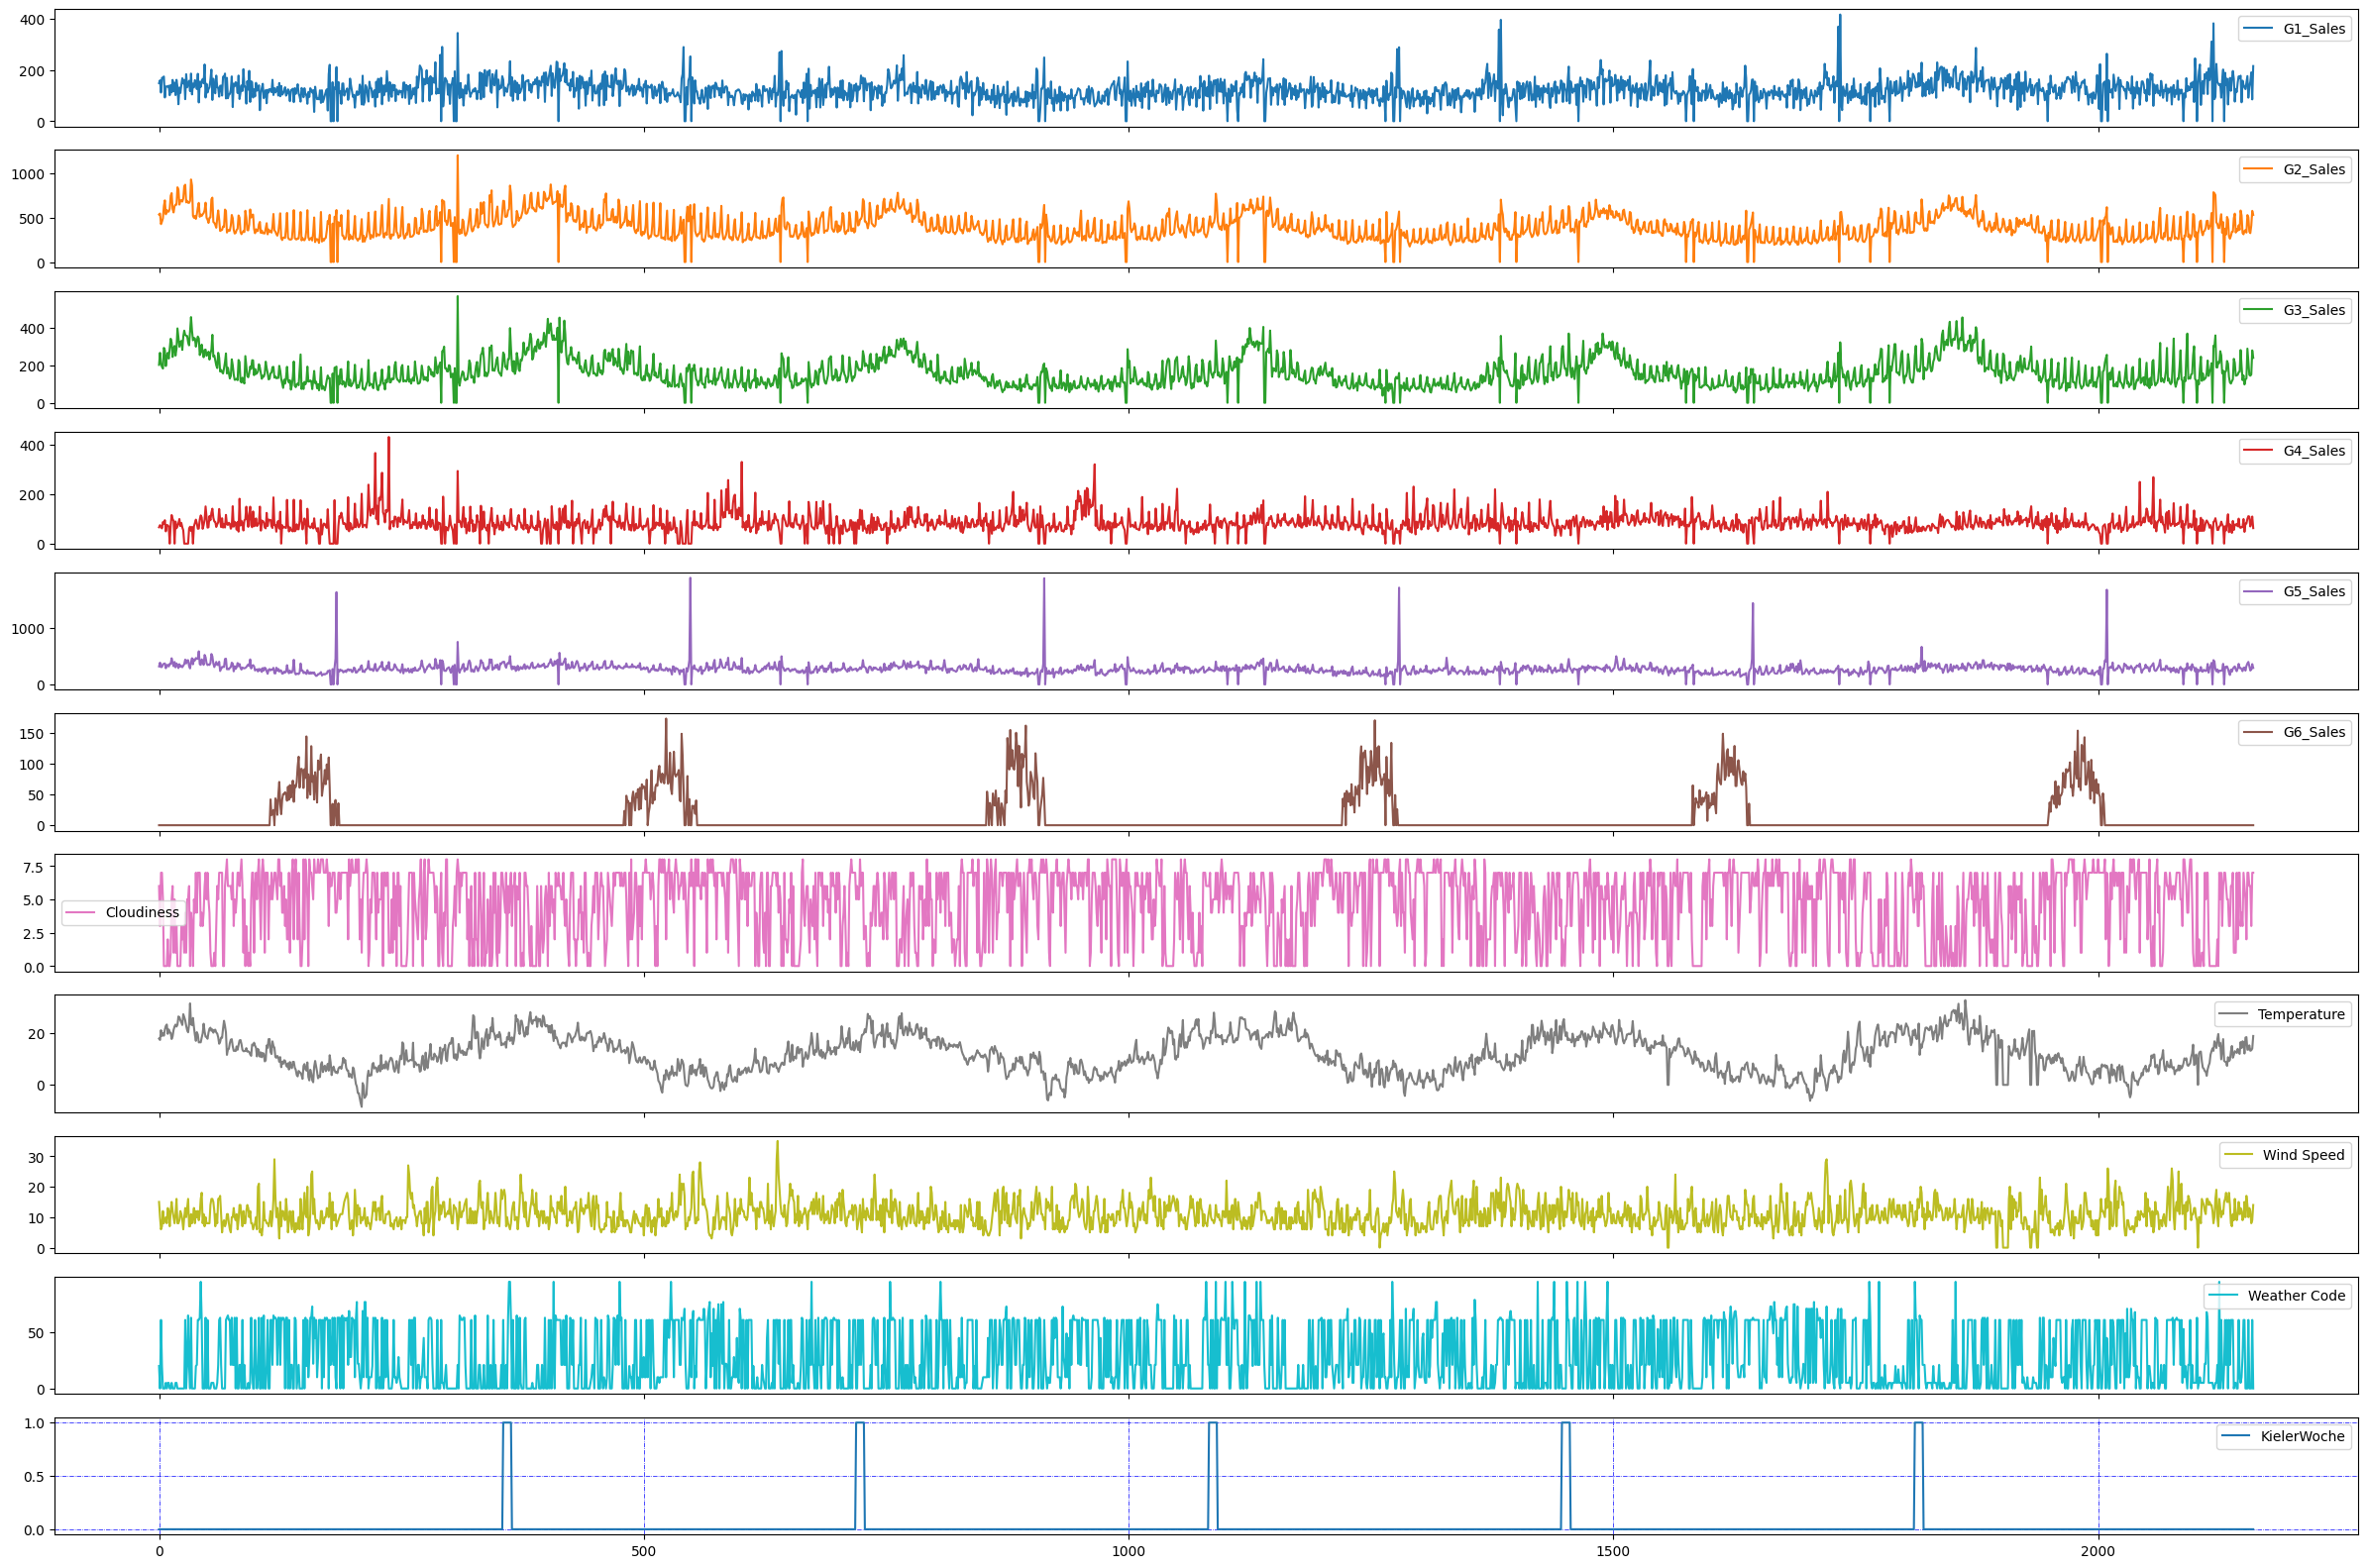

In [47]:
# plt.figure(figsize=(30,10))
myData.plot(subplots=True, figsize=(30,20))
plt.grid(color='b', linestyle='-.', linewidth=0.5)
plt.show()

### Input - Output Feature Selection

In [48]:
input_names = ['G1_Sales', 'G2_Sales', 'G3_Sales', 'G4_Sales', 'G5_Sales', 'G6_Sales', 'Cloudiness', 'Temperature', 'Wind Speed', 'Weather Code', 'KielerWoche']
input_names = ['G1_Sales', 'G2_Sales', 'G3_Sales', 'G4_Sales', 'G5_Sales', 'G6_Sales']
target_names = ['G1_Sales', 'G2_Sales', 'G3_Sales', 'G4_Sales', 'G5_Sales', 'G6_Sales']

### Attempting to Predict the future Target Features.

#### To achieve this we shift the target features by one timestep backward

In [49]:
shift_steps = 30

### Create a new DataFrame with the time-shifted data.

#### **Note the negative time-shift!**

In [50]:
df_targets = myData[target_names].shift(-shift_steps)
df_targets

,G1_Sales,G2_Sales,G3_Sales,G4_Sales,G5_Sales,G6_Sales
0,144.745432,667.842224,321.075921,0.000000,426.985804,0.0
1,157.854023,667.213719,304.830310,60.561457,322.294307,0.0
2,117.359342,689.695101,379.526701,68.122202,282.371517,0.0
3,186.027179,930.801703,454.705781,51.274999,399.283316,0.0
4,104.708217,862.752429,382.856488,67.156882,461.704849,0.0
...,...,...,...,...,...,...
2156,NaN,NaN,NaN,NaN,NaN,NaN
2157,NaN,NaN,NaN,NaN,NaN,NaN
2158,NaN,NaN,NaN,NaN,NaN,NaN
2159,NaN,NaN,NaN,NaN,NaN,NaN


**WARNING!** You should double-check that you have shifted the data in the right direction! We want to predict the future, not the past!

The shifted data-frame is confusing because Pandas keeps the original time-stamps even though we have shifted the data. You can check the time-shift is correct by comparing the original and time-shifted data-frames.

This is the first `shift_steps + 5` rows of the original data-frame:

In [51]:
myData[target_names].head(shift_steps + 5)

,G1_Sales,G2_Sales,G3_Sales,G4_Sales,G5_Sales,G6_Sales
0,148.828353,535.856285,201.198426,65.890169,317.475875,0.0
1,159.793757,546.780787,265.261254,74.543917,383.628682,0.0
2,111.885594,427.343259,210.260241,69.262728,305.523072,0.0
3,168.864941,454.859641,190.686641,61.490175,308.408168,0.0
4,171.280754,492.818804,181.644870,86.759861,355.518770,0.0
5,174.552360,631.906068,291.557960,80.646577,361.866933,0.0
6,92.637755,695.255730,279.665939,94.603902,370.209601,0.0
7,135.500244,538.529250,195.158794,49.500024,285.233382,0.0
8,136.048383,585.957265,245.808339,75.208998,342.089346,0.0
9,135.132314,567.365765,265.109143,73.805651,343.353067,0.0


The following is the `first 5 rows` of the time-shifted data-frame. This should be identical to the `last 5 rows` shown above from the original data, except for the time-stamp.

In [52]:
df_targets.head(5)

,G1_Sales,G2_Sales,G3_Sales,G4_Sales,G5_Sales,G6_Sales
0,144.745432,667.842224,321.075921,0.000000,426.985804,0.0
1,157.854023,667.213719,304.830310,60.561457,322.294307,0.0
2,117.359342,689.695101,379.526701,68.122202,282.371517,0.0
3,186.027179,930.801703,454.705781,51.274999,399.283316,0.0
4,104.708217,862.752429,382.856488,67.156882,461.704849,0.0


The time-shifted data-frame has the same length as the original data-frame, but the last observations are `NaN` (not a number) because the data has been shifted backwards so we are trying to shift data that does not exist in the original data-frame.

In [53]:
df_targets.tail()

,G1_Sales,G2_Sales,G3_Sales,G4_Sales,G5_Sales,G6_Sales
2156,NaN,NaN,NaN,NaN,NaN,NaN
2157,NaN,NaN,NaN,NaN,NaN,NaN
2158,NaN,NaN,NaN,NaN,NaN,NaN
2159,NaN,NaN,NaN,NaN,NaN,NaN
2160,NaN,NaN,NaN,NaN,NaN,NaN


### NumPy Arrays

We now convert the Pandas data-frames to NumPy arrays that can be input to the neural network. We also remove the last part of the numpy arrays, because the target-data has `NaN` for the shifted period, and we only want to have valid data and we need the same array-shapes for the input- and output-data.

These are the input-signals:

In [54]:
x_data = myData[input_names].values[:-shift_steps].astype(np.float32, casting='unsafe')
# x_data = myData[input_names].values
x_data

array([[148.82835 , 535.85626 , 201.19843 ,  65.89017 , 317.47586 ,
          0.      ],
       [159.79376 , 546.78076 , 265.26126 ,  74.543915, 383.6287  ,
          0.      ],
       [111.8856  , 427.34326 , 210.26024 ,  69.262726, 305.52307 ,
          0.      ],
       ...,
       [161.76506 , 329.38852 , 156.57657 ,  77.30512 , 250.12642 ,
          0.      ],
       [201.96498 , 449.26334 , 170.86798 ,  70.026344, 362.93732 ,
          0.      ],
       [  0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ]], dtype=float32)

### Input Data Characteristics

In [55]:
print("X-data Type:", type(x_data))
print("X-data Dtype:", x_data.dtype)
print("X-data Shape:", x_data.shape)
print("X-data Infinite values:", np.isinf(x_data).any())
print("X-data NaN values:", np.isnan(x_data).any())

X-data Type: <class 'numpy.ndarray'>
X-data Dtype: float32
X-data Shape: (2131, 6)
X-data Infinite values: False
X-data NaN values: False


These are the output-signals (or target-signals):

In [56]:
y_data = df_targets.values[:-shift_steps].astype(np.float32, casting='unsafe')
# y_data = df_targets.values
y_data

array([[144.74544 , 667.8422  , 321.07593 ,   0.      , 426.9858  ,
          0.      ],
       [157.85402 , 667.21375 , 304.83032 ,  60.56146 , 322.2943  ,
          0.      ],
       [117.359344, 689.6951  , 379.5267  ,  68.1222  , 282.37152 ,
          0.      ],
       ...,
       [190.85011 , 410.8422  , 150.2358  ,  85.86424 , 261.40295 ,
          0.      ],
       [ 85.14593 , 577.0077  , 278.09445 , 109.26455 , 358.53107 ,
          0.      ],
       [215.45406 , 531.4181  , 238.70305 ,  62.585167, 290.40985 ,
          0.      ]], dtype=float32)

### Target Data Characteristics

In [57]:
print("Y-data Type:", type(y_data))
print("Y-data Dtype:", y_data.dtype)
print("Y-data Shape:", y_data.shape)
print("Y-data Infinite values:", np.isinf(y_data).any())
print("Y-data NaN values:", np.isnan(y_data).any())

Y-data Type: <class 'numpy.ndarray'>
Y-data Dtype: float32
Y-data Shape: (2131, 6)
Y-data Infinite values: False
Y-data NaN values: False


This is the number of observations (aka. data-points or samples) in the data-set:

In [58]:
num_data = len(x_data)
num_data

2131

### Define training, validation and testing sample size

In [59]:
batch_size = 32
sequence_length = 100
train_split = 0.9
num_train = int(train_split * num_data)
num_val = int(0.5*(num_data - num_train))
num_test = (num_data - num_train) - num_val
steps_per_epoch = int((num_train/batch_size)/40)
train_validation_steps = int((num_val/batch_size))
test_validation_steps = int((num_test/batch_size))
test_validation_steps = 1
print('num_train:',num_train, 'num_val:',num_val, 'num_test:',num_test)
print('steps_per_epoch:', steps_per_epoch)
print('train_validation_steps:', train_validation_steps, 'test_validation_steps:', test_validation_steps)

num_train: 1917 num_val: 107 num_test: 107
steps_per_epoch: 1
train_validation_steps: 3 test_validation_steps: 1


In [60]:
y_scaler = MinMaxScaler(feature_range=(-1, 1)).fit(y_data)
x_scaler = MinMaxScaler(feature_range=(-1, 1)).fit(x_data)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=train_split, random_state=None, shuffle=False )
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1917, 6)
y_train shape: (1917, 6)
x_test shape: (214, 6)
y_test shape: (214, 6)


### Visualize Time Shifted Targets

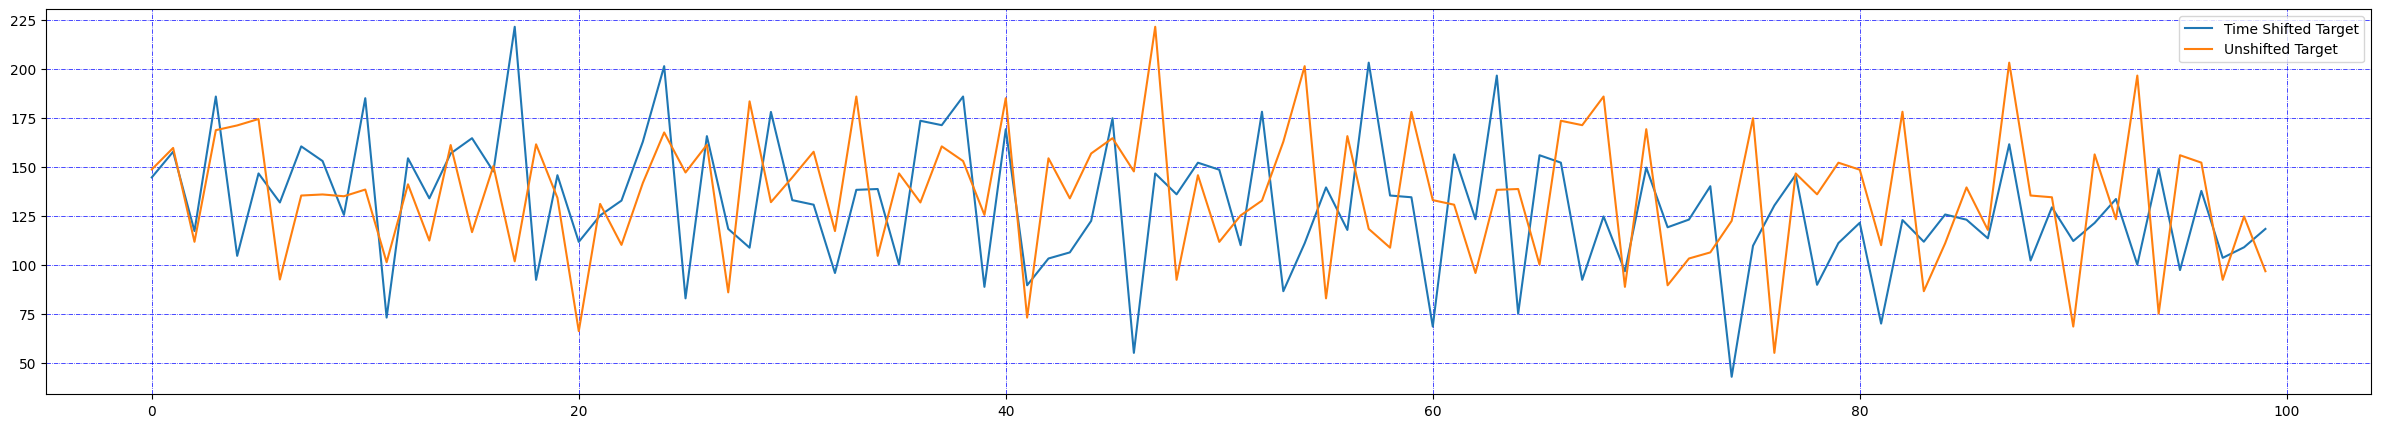

In [62]:
signal_ = 0  # First signal from the 20 input-signals.
seq = y_train[:100, signal_].reshape(-1,1)
seq1 = myData[target_names].values[:100, signal_].reshape(-1,1)
plt.figure(figsize=(30,5))
plt.grid(color='b', linestyle='-.', linewidth=0.5)
plt.plot(np.concatenate((seq, seq1), axis=1))
plt.legend(['Time Shifted Target','Unshifted Target', ])
# np.concatenate((seq,seq1), axis=1)

This is the number of observations in the training-set:

In [63]:
num_train = len(x_train)
num_train

1917

This is the number of observations in the test-set:

In [64]:
num_test = len(x_test)
num_test

214

These is the total number of input observations for the training and test sets:

In [65]:
len(x_train) + len(x_test)

2131

These is the total number of output observations for the training and test sets:

In [66]:
len(y_train) + len(y_test)

2131

This is the number of input features:

In [67]:
num_x_signals = x_data.shape[1]
num_x_signals

6

This is the number of target features:

In [68]:
num_y_signals = y_data.shape[1]
num_y_signals

6

### Check Data Magnitudes

The data-set contains a wide range of values:

In [69]:
print('x_train min:', x_train.min())
print('x_train max:', x_train.max())

print('y_train min:', y_train.min())
print('y_train max:', y_train.max())

print('x_test min:', x_test.min())
print('x_test max:', x_test.max())

print('y_test min:', y_test.min())
print('y_test max:', y_test.max())

x_train min: 0.0
x_train max: 1879.4618
y_train min: 0.0
y_train max: 1879.4618
x_test min: 0.0
x_test max: 1668.1244
y_test min: 0.0
y_test max: 1668.1244



## Check Train and Test Set Distribution


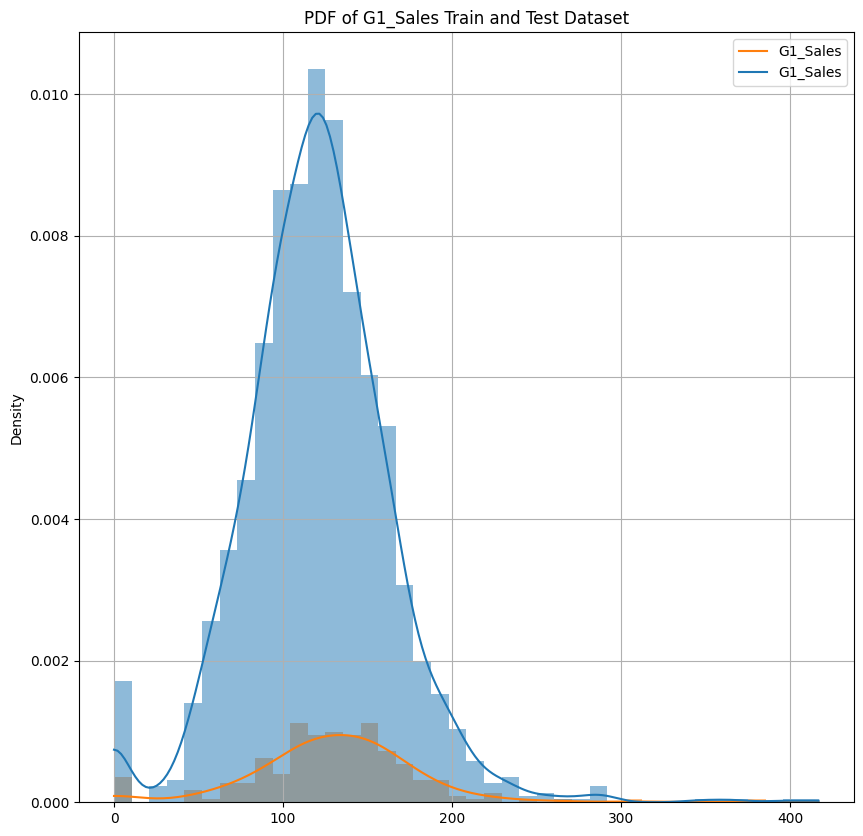

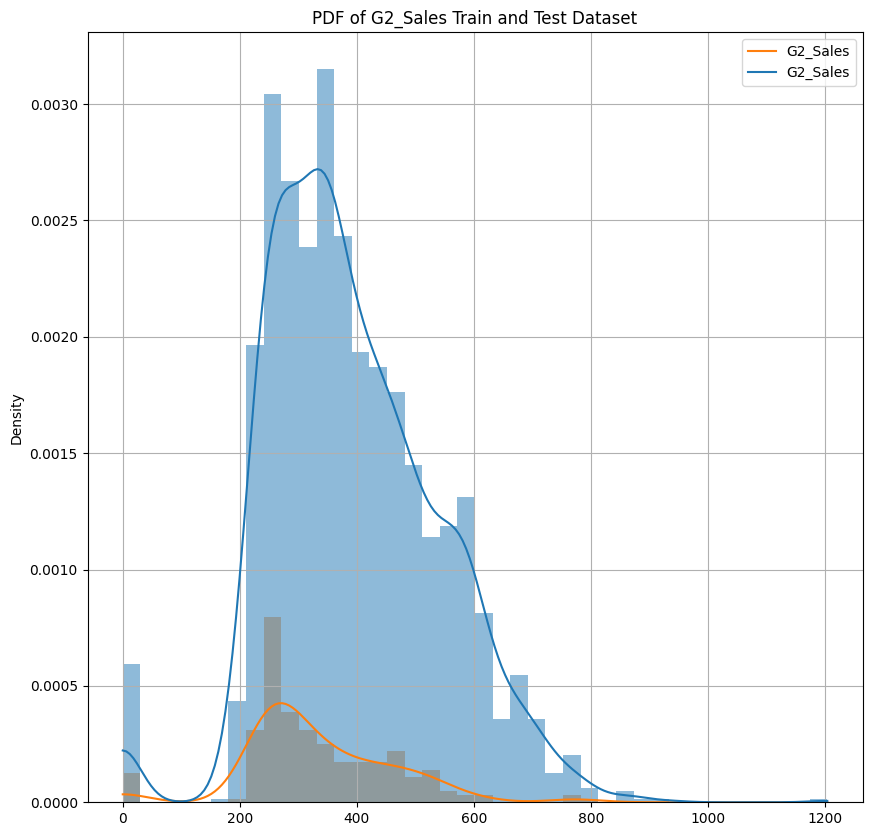

In [70]:
plt.figure(figsize=(10,10))
sns.histplot([y_train[:,0],y_test[:,0]], bins=40, kde=True, stat="density", linewidth=0, edgecolor='black')
plt.legend(['G1_Sales', 'G1_Sales'])
plt.title('PDF of G1_Sales Train and Test Dataset')
plt.grid()
plt.show()

plt.figure(figsize=(10,10))
sns.histplot([y_train[:,1],y_test[:,1]], bins=40, kde=True, stat="density", linewidth=0, edgecolor='black')
plt.legend(['G2_Sales', 'G2_Sales'])
plt.title('PDF of G2_Sales Train and Test Dataset')
plt.grid()
plt.show()


## Custom Tensorflow Data Generator 

The data-set has now been prepared as 2-dimensional numpy arrays. 

These are the array-shapes of the input and output data:

x_train shape:  (32, 100, 6) x_train dtype: float32
y_train0 shape:  (32, 30, 6) y_train dtype: float32
x_val shape:  (32, 100, 6) x_val dtype: float32
y_val0 shape:  (32, 30, 6) y_val dtype: float32
x_test shape:  (32, 100, 6) x_test dtype: float32
y_val0 shape:  (32, 30, 6) y_val dtype: float32


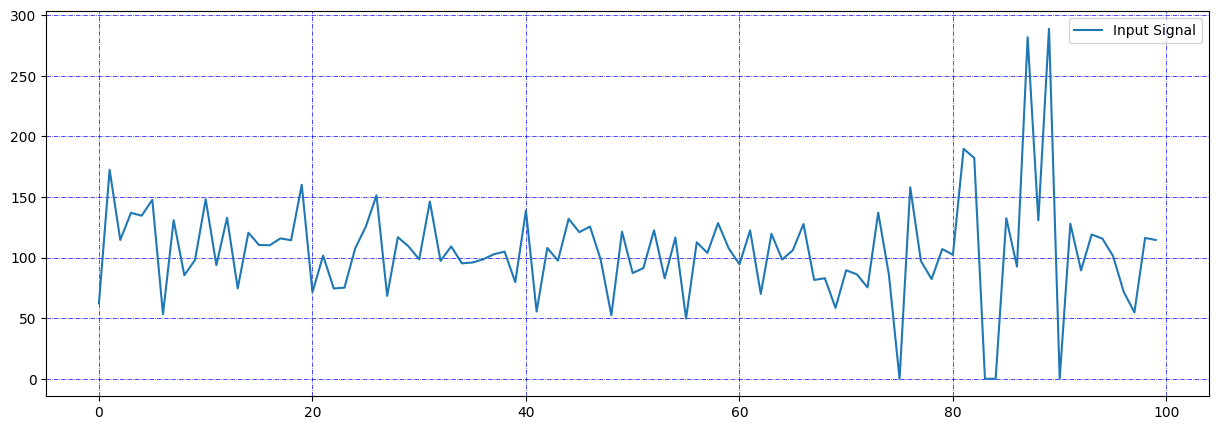

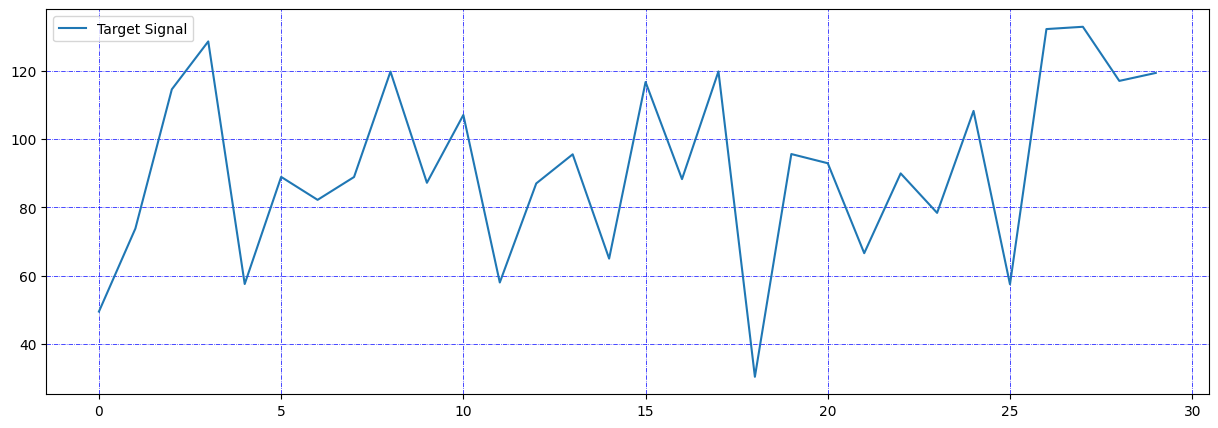

In [71]:
class CustomDataGen(tf.keras.utils.Sequence):
        
    def __init__ (self, x_data, y_data, batch_size=None, sequence_length=None, shift_steps=None, train=True, validation=True, random_batch=True, random_idx=False):
        
        self.x_train = x_data[0]
        self.x_test = x_data[1]        
        self.y_train = y_data[0]
        self.y_test = y_data[1]
        self.batch_size = batch_size
        self.sequence_length = sequence_length
        self.shift_steps = shift_steps
        self.train = train
        self.validation = validation
        self.random_batch = random_batch
        self.random_idx = random_idx
        self.n = int(self.x_train.shape[0])
    
    def on_epoch_end(self):
        #do nothing
        return

    def __getitem__(self, index):
        if self.train:
            # print('using train samples')
            x_samples = self.x_train 
            y_samples = self.y_train 
            self.n = x_samples.shape[0]

        elif self.validation:
            # print('using validation samples')
            x_samples = self.x_test[:num_val]
            y_samples = self.y_test[:num_val]
            self.n = x_samples.shape[0]
        else:
            # print('using test samples')
            x_samples = self.x_test[-num_test:]
            y_samples = self.y_test[-num_test:]
            self.n = x_samples.shape[0]

            # Allocate a new array for the batch of input-signals.
        if self.train : #or self.validation
            # sequence_length_ = np.random.randint(1,self.sequence_length)
            sequence_length_ = self.sequence_length

        else:
            sequence_length_ = self.sequence_length
            # print(f"Sequence_length: {sequence_length_}")
        
        if self.random_batch:
            batch_size_ = np.random.randint(1,self.batch_size)
        else: 
            batch_size_ = batch_size
        
 
        x_shape = (batch_size_, self.sequence_length, x_samples.shape[1])
        y_shape = (batch_size_, self.shift_steps, y_samples.shape[1])
        x_batch = np.zeros(shape=x_shape, dtype=np.float32)  
        y_batch = np.zeros(shape=y_shape, dtype=np.float32) 

            
        # Fill the batch with random sequences of data.
        for i in range(batch_size_):
            # Get a random start-index.
            idx = np.random.randint(self.n - sequence_length_)

            if self.random_idx:
                sample_idx = np.random.randint(1,x_samples.shape[-1])
            else:
                sample_idx = x_samples.shape[-1]

            # Inputs
            x_batch[i:, :sequence_length_, :] = x_samples[idx:idx+sequence_length_].reshape(-1,x_samples.shape[-1]) 
            
            # Outputs
            y_batch[i] = y_samples[idx+sequence_length_-self.shift_steps:idx+sequence_length_]  
        
        assert not (np.isnan(x_batch).any() or np.isnan(x_batch).any())

        return x_batch, y_batch 
    
    def __len__(self):
        return int(self.n / self.batch_size)


x_train_generator = CustomDataGen((x_train, x_test), (y_train, y_test), batch_size=batch_size, sequence_length=sequence_length, shift_steps=shift_steps, train=True, validation=False, random_batch=False, random_idx=True)
x_train_batch, y_train_batch=x_train_generator.__getitem__(1)

print('x_train shape: ', x_train_batch.shape, 'x_train dtype:', x_train_batch.dtype)  
print('y_train0 shape: ', y_train_batch.shape, 'y_train dtype:', y_train_batch.dtype)


x_val_generator = CustomDataGen((x_train, x_test), (y_train, y_test), batch_size=batch_size, sequence_length=sequence_length, shift_steps=shift_steps, train=False, validation=True, random_batch=False, random_idx=True)
x_val_batch, y_val_batch=x_val_generator.__getitem__(1)

print('x_val shape: ', x_val_batch.shape, 'x_val dtype:', x_val_batch.dtype)  
print('y_val0 shape: ', y_val_batch.shape, 'y_val dtype:', y_val_batch.dtype)


x_test_generator = CustomDataGen((x_train, x_test), (y_train, y_test), batch_size=batch_size, sequence_length=sequence_length, shift_steps=shift_steps, train=False, validation=False,  random_batch=False, random_idx=True)
x_test_batch, y_test_batch=x_test_generator.__getitem__(1)

print('x_test shape: ', x_test_batch.shape, 'x_test dtype:', x_test_batch.dtype)  
print('y_val0 shape: ', y_val_batch.shape, 'y_val dtype:', y_val_batch.dtype)


batch = 0   # First sequence in the batch.
signal_ = 0  # First signal from the 20 input-signals.
seq = x_train_batch[batch, :, signal_]
plt.figure(figsize=(15,5))
plt.grid(color='b', linestyle='-.', linewidth=0.5)
plt.plot(seq)
plt.legend(['Input Signal'])
seq = y_train_batch[batch, :, signal_]
plt.figure(figsize=(15,5))
plt.grid(color='b', linestyle='-.', linewidth=0.5)
plt.plot(seq)
plt.legend(['Target Signal'])


## Implement Custom Loss Function

In [177]:
with tf.device('/device:GPU:0'):
    # @tf.function( experimental_relax_shapes=True, reduce_retracing=True)
    class MeanExponentWeightedError(tf.keras.losses.Loss):

      def call(self, y_true, y_pred):
          
          y_true = tf.math.multiply_no_nan(y_true,1)
          y_pred = tf.math.multiply_no_nan(y_pred,1)

          assert not tf.reduce_any(tf.math.is_nan(y_true, name=None))
          assert not tf.reduce_any(tf.math.is_nan(y_pred, name=None))
          
          # Calculate the loss for each value in these tensors.    
          # mean_squared_error = tf.keras.losses.mean_squared_error(y_true=y_true, y_pred=y_pred)
          # root_mean_squared_error = tf.reduce_mean(tf.math.sqrt(mean_squared_error))
          # loss_mae = tf.keras.losses.mean_absolute_error(y_true=y_true, y_pred=y_pred)
          # loss_mape = tf.keras.losses.mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
          # loss_rmape = tf.math.sqrt(loss_mape)
          # loss = tf.math.reduce_sum([loss_mse,loss_rmse,loss_mae,loss_mape,loss_rmape], axis=-1)
          
          # initialize exponential weighting values 
          powers = tf.range(start=2, limit=1, delta=tf.math.divide(-1,y_pred.shape[-2]), dtype=float, name='range').reshape(1,-1,1)
          # powers = tf.range(start=2, limit=0, delta=tf.math.divide(-2,shift_steps), dtype=float, name='range').reshape(1,-1,1)
          # replicate along batch and features
          powers = tf.repeat(powers,repeats=y_pred.shape[-1], axis=-1)
          # powers = tf.repeat(powers,repeats=num_y_signals, axis=-1)
          powers = tf.repeat(powers,repeats=y_pred.shape[-3], axis=-3)
          # powers = tf.repeat(powers,repeats=batch_size, axis=-3)
          # compute absolute error
          error = tf.math.subtract(y_true, y_pred)
          absolute_error = tf.math.abs(error)
          # compute weighted error
          exp_weighted_error = tf.math.pow(absolute_error, powers)
          # compute mean weighted error
          mean_exp_weighted_error = tf.math.reduce_mean(exp_weighted_error, axis=None, keepdims=False, name=None)

          # return tf.math.reduce_sum([mean_exp_weighted_error, root_mean_squared_error], axis=-1)          
          return mean_exp_weighted_error

# Build and Compile the GRU Sales Predicition Model

In [178]:
from keras.api._v2.keras.backend import batch_normalization
def create_GRU_model():
    inputs = layers.Input(name='Input_Layer', shape=(None, num_x_signals))

    # Extract Features
    Out1 = Bidirectional(LSTM(name='H1', units=100, return_sequences=True, trainable=True), name='H1_Layer')(inputs)
    norm_Out1 = BatchNormalization(name='BN1_Layer')(Out1)
    Out2 = Bidirectional(LSTM(name='H2', units=100, return_sequences=True, trainable=True), name='H2_Layer')(norm_Out1)
    norm_Out2 = BatchNormalization(name='BN2_Layer')(Out2)
    Out3 = Bidirectional(LSTM(name='H3', units=100, return_sequences=True, trainable=True), name='H3_Layer')(norm_Out2)
    norm_Out3 = BatchNormalization(name='BN3_Layer')(Out3)
    Out4 = Bidirectional(LSTM(name='H4', units=100, return_sequences=True, trainable=True), name='H4_Layer')(norm_Out3)
    norm_Out4 = BatchNormalization(name='BN4_layer')(Out4)
    Out5 = Bidirectional(LSTM(name='H5', units=100, return_sequences=True, trainable=True), name='H5_Layer')(norm_Out4)
    norm_Out5 = BatchNormalization(name='BN5_Layer')(Out5)
    Out6 = Bidirectional(LSTM(name='H6', units=100, return_sequences=True, trainable=True), name='H6_Layer')(norm_Out5)
    norm_Out6 = BatchNormalization(name='BN6_Layer')(Out6)
    Out7 = Bidirectional(LSTM(name='H7', units=100, return_sequences=True, trainable=True), name='H7_Layer')(norm_Out6)
    norm_Out7 = BatchNormalization(name='BN7_Layer')(Out7)
    Out8 = Bidirectional(LSTM(name='H7', units=100, return_sequences=True, trainable=True), name='H8_Layer')(norm_Out7)
    norm_Out8 = BatchNormalization(name='BN8_Layer')(Out8)
    Out9 = Bidirectional(LSTM(name='H9', units=100, return_sequences=True, trainable=True), name='H9_Layer')(norm_Out8)
    norm_Out9 = BatchNormalization(name='BN9_Layer')(Out9)
    Out10 = Bidirectional(LSTM(name='H10', units=100, return_sequences=True, trainable=True), name='H10_Layer')(norm_Out9)
    norm_Out10 = BatchNormalization(name='BN10_layer')(Out10)
    Out11 = Bidirectional(LSTM(name='H11', units=100, return_sequences=True, trainable=True), name='H11_Layer')(norm_Out10)
    norm_Out11 = BatchNormalization(name='BN11_Layer')(Out11)
    Out12 = Bidirectional(LSTM(name='H12', units=num_y_signals, return_sequences=False, trainable=True), name='H12_Layer')(norm_Out11)
    norm_Out12 = BatchNormalization(name='BN12_Layer')(Out12)
    
    # Predict output from features
    rescaled_out = Dense(num_y_signals*shift_steps, name='FC_Layer', activation='linear', use_bias=True)(norm_Out12)
    outputs = Reshape(name='Output_Layer', target_shape=(shift_steps, num_y_signals))(rescaled_out)
        
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=outputs, name='GRU_Sales_Model')

    # Create Optimizer.
    learning_rate = 0.1
    first_decay_steps = 1000
    lr_decayed_fn = tf.keras.optimizers.schedules.CosineDecayRestarts(learning_rate, first_decay_steps)
    optimizer = Adam(learning_rate=learning_rate, amsgrad=True)
    # moving_avg_Adam = tfa.optimizers.MovingAverage(optimizer)
    stocastic_avg_Adam = tfa.optimizers.SWA(optimizer) 
    
    model.compile(loss=MeanExponentWeightedError(), optimizer=stocastic_avg_Adam, metrics=['mse','acc', 'mae', 'mape'], run_eagerly=True)
    model.build((batch_size, sequence_length, num_x_signals))

    return model

GRU_Sales_model = create_GRU_model()

GRU_Sales_model.summary()

Model: "GRU_Sales_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, None, 6)]         0         
                                                                 
 H1_Layer (Bidirectional)    (None, None, 200)         85600     
                                                                 
 BN1_Layer (BatchNormalizati  (None, None, 200)        800       
 on)                                                             
                                                                 
 H2_Layer (Bidirectional)    (None, None, 200)         240800    
                                                                 
 BN2_Layer (BatchNormalizati  (None, None, 200)        800       
 on)                                                             
                                                                 
 H3_Layer (Bidirectional)    (None, None, 200)     

In [179]:
MeanExponentWeightedError()(y_train_batch, GRU_Sales_model.predict(x_train_batch, steps=1))

1/1 [==============================] - 1s 721ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=9767.902>

In [180]:
_ = GRU_Sales_model.evaluate(x_train_generator, steps=10)

10/10 [==============================] - 8s 735ms/step - loss: 10007.5498 - mse: 52724.8203 - acc: 0.2120 - mae: 172.7834 - mape: 1078084.2500


# Plot GRU Sales model

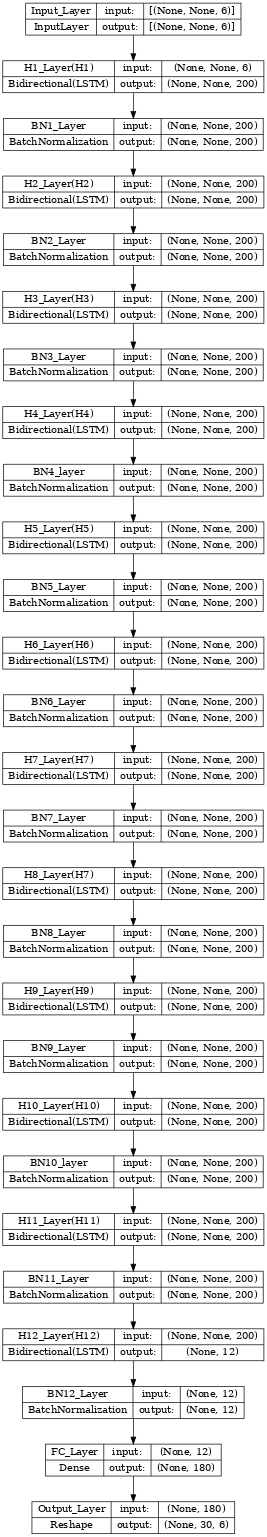

In [181]:
plot_model(GRU_Sales_model, show_shapes=True, to_file=os.path.join(DATA_FOLDER, r'model/GRU_Sales_model.png'), show_layer_names=True, rankdir='TB', expand_nested=True, dpi=50)

## Implement Callback Functions

During training we want to save checkpoints and log the progress to TensorBoard so we create the appropriate callbacks for Keras.
This is the callback for writing checkpoints during training.

In [182]:
path_checkpoint = os.path.join(DATA_FOLDER, r'model/GRU_Sales_model.h5')
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=False,
                                      restore_best_weights=True,
                                      save_best_only=True)

path_checkpoint_MA = os.path.join(DATA_FOLDER, r'model/GRU_Sales_MA.h5')

path_checkpoint_SWA = os.path.join(DATA_FOLDER, r'model/GRU_Sales_SWA.h5')

callback_MA = tfa.callbacks.AverageModelCheckpoint(filepath=path_checkpoint_MA, 
                                                    monitor='val_mse',
                                                    update_weights=True)

callback_SWA = tfa.callbacks.AverageModelCheckpoint(filepath=path_checkpoint_SWA,
                                                    monitor='val_mse',
                                                    update_weights=True)

This is the callback for stopping the optimization when performance worsens on the validation-set.

In [183]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=400, verbose=1)

This is the callback for writing the TensorBoard log during training.

In [184]:
dirpaths = [Path(os.path.join(DATA_FOLDER, r'model//TensorBoard/'))]

for dirpath in dirpaths:
    if dirpath.exists() and dirpath.is_dir():
        try:        
            shutil.rmtree(dirpath, ignore_errors=True)
            os.chmod(dirpath, 0o777)
            os.rmdir(dirpath)
            os.removedirs(dirpath)
            print("Directory '%s' has been removed successfully", dirpath)
        except OSError as error:
            print(error)
            print("Directory '%s' can not be removed", dirpath)
            
callback_tensorboard = TensorBoard(log_dir=os.path.join(DATA_FOLDER, r'model//TensorBoard/'),
                                   histogram_freq=1,
                                   write_graph=True,
                                   profile_batch = '500,520')

[Errno 2] No such file or directory: '../data/model/TensorBoard'
Directory '%s' can not be removed ../data/model/TensorBoard


2023-01-02 03:38:51.345860: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-01-02 03:38:51.345954: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-01-02 03:38:51.346051: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:133] cuptiGetTimestamp: ignored due to a previous error.
2023-01-02 03:38:51.346096: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:184] cuptiSubscribe: ignored due to a previous error.
2023-01-02 03:38:51.346107: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:457] cuptiGetResultString: ignored due to a previous error.
2023-01-02 03:38:51.346118: E tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1715] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error 
2023-01-02 03:38:51.347054: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-01-02 03:38:51.

This callback reduces the learning-rate for the optimizer if the validation-loss has not improved since the last epoch (as indicated by `patience=10`). The learning-rate will be reduced by multiplying it with the given factor. We set a start learning-rate of 1e-3 above, so multiplying it by 0.95 gives a learning-rate of 9.5e-4. We don't want the learning-rate to go any lower 1e-5

In [185]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.99,
                                       min_lr=1e-7,
                                       patience=5,
                                       verbose=1)    

In [186]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_SWA,
             callback_reduce_lr]

#### Load weights from last checkpoint

In [187]:
filepath = path_checkpoint
def train_model(resume, epochs, initial_epoch, batch_size, model):
    def fit_model():
        with tf.device('/device:GPU:0'):
            print(model.summary())
            history=model.fit(x_train_generator, 
                              steps_per_epoch=steps_per_epoch, 
                              epochs=EPOCHS, 
                              verbose=1, 
                              callbacks=callbacks,
                              validation_data=x_val_generator, 
                              validation_steps=train_validation_steps, 
                              #validation_freq=5,
                              #class_weight=None, 
                              #max_queue_size=10, 
                              #workers=8, 
                              #use_multiprocessing=True,
                              #shuffle=True, 
                              initial_epoch=initial_epoch)
            model.load_weights(path_checkpoint)            
            model.save(filepath)
            model.evaluate(x_test_generator, steps=test_validation_steps)
        
            return history
    
    if resume:
        try:
            #del model
            model.load_weights(filepath, {"MeanExponentWeightedError":MeanExponentWeightedError})
            model.save(filepath)
            model = load_model(filepath, {"MeanExponentWeightedError":MeanExponentWeightedError})
            print("Checkpoint Loaded")  
        except Exception as error:
            print("Error trying to load checkpoint.")
            print(error)
        
    # Training the Model
    return fit_model()
    
with tf.device('/device:GPU:0'):
    def plot_train_history(history, title):
        loss = history.history['loss']
        accuracy = history.history['acc']
        mape = history.history['mape']
        mae = history.history['mae']
        val_loss = history.history['val_loss']
        val_accuracy = history.history['val_acc']
        val_mae = history.history['val_mae']
        val_mape = history.history['val_mape']
        epochs = range(len(loss))
        plt.figure(figsize=(30,5))
        plt.plot(epochs, loss, label='training_loss') 
        plt.plot(epochs, val_loss, label='validation_loss')
        plt.show()
        plt.figure(figsize=(30,5))
        plt.plot(epochs, accuracy, label='training_accuracy') 
        plt.plot(epochs, val_accuracy, label='validation_accuracy')
        plt.show()
        plt.figure(figsize=(30,5))
        plt.plot(epochs, mae, label='training_mae') 
        plt.plot(epochs, val_mae, label='validation_mae')
        plt.show()
        plt.figure(figsize=(30,5))
        plt.plot(epochs, mape, label='training_mape') 
        plt.plot(epochs, val_mape, label='validation_mape')
        plt.show()
        return



## Train Model

In [188]:
EPOCHS = 2000

steps_per_epoch = int((num_train/batch_size))

for _ in range(1):
  try:
    # GRU_Sales_model.load_weights(os.path.join(DATA_FOLDER, r'model/GRU_Sales_model.h5'), {"MeanExponentWeightedError":MeanExponentWeightedError()})
    # GRU_Sales_model.save(filepath)
    # GRU_Sales_model = load_model(os.path.join(DATA_FOLDER, r'model/GRU_Sales_model.h5'), {"MeanExponentWeightedError":MeanExponentWeightedError()})
    print("Checkpoint Loaded")  
  except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)
    
# Train model
with tf.device('/device:GPU:0'):
    history = train_model(resume=False, epochs=EPOCHS, initial_epoch=0, batch_size=batch_size, model=GRU_Sales_model)
    plot_train_history(history, 'Model Training History')
    GRU_Sales_model.history

Checkpoint Loaded
Model: "GRU_Sales_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, None, 6)]         0         
                                                                 
 H1_Layer (Bidirectional)    (None, None, 200)         85600     
                                                                 
 BN1_Layer (BatchNormalizati  (None, None, 200)        800       
 on)                                                             
                                                                 
 H2_Layer (Bidirectional)    (None, None, 200)         240800    
                                                                 
 BN2_Layer (BatchNormalizati  (None, None, 200)        800       
 on)                                                             
                                                                 
 H3_Layer (Bidirectional)    (Non

### Load Checkpoint

Because we use early-stopping when training the model, it is possible that the model's performance has worsened on the test-set for several epochs before training was stopped. We therefore reload the last saved checkpoint, which should have the best performance on the test-set.

In [ ]:
with tf.device('/device:GPU:0'):
    try:
        GRU_Sales_model = load_model(os.path.join(DATA_FOLDER, r'model/GRU_Sales_model.h5'), {"MeanExponentWeightedError":MeanExponentWeightedError})
        GRU_Sales_model.load_weights(os.path.join(DATA_FOLDER, r'model/GRU_Sales_model.h5'), {"MeanExponentWeightedError":MeanExponentWeightedError})
        print("Checkpoint Loaded")
    except Exception as error:
        print("Error trying to load checkpoint.")
        print(error)

KeyboardInterrupt: 

## Performance on Test-Set

We can now evaluate the model's performance on the test-set. This function expects a batch of data, but we will just use one long time-series for the test-set, so we just expand the array-dimensionality to create a batch with that one sequence.

In [ ]:
with tf.device('/device:GPU:0'):
    GRU_Sales_model.evaluate(x_train_generator, steps=train_validation_steps)
    GRU_Sales_model.evaluate(x_val_generator, steps=train_validation_steps)
    GRU_Sales_model.evaluate(x_test_generator, steps=test_validation_steps)

In [ ]:
warmup_steps = 0
start_idx = 10
test_length = 100

with tf.device('/device:GPU:0'):
        mape = tf.keras.losses.MeanAbsolutePercentageError()
        input_names = ['G1_Sales', 'G2_Sales', 'G3_Sales', 'G4_Sales', 'G5_Sales', 'G6_Sales', 'Cloudiness', 'Temperature', 'Wind Speed', 'Weather Code', 'KielerWoche']
        target_names = ['G1_Sales', 'G2_Sales', 'G3_Sales', 'G4_Sales', 'G5_Sales', 'G6_Sales']
        sequence_length = 30

        x_true = np.zeros(shape=(test_length,num_x_signals))
        y_pred = np.zeros(shape=(test_length,num_y_signals))
        y_true = np.zeros(shape=(test_length,num_y_signals))

        for i in tqdm_notebook(range(start_idx,start_idx+test_length), desc='Loop 1'):
                x = x_test[i:i+sequence_length].reshape(1,sequence_length,-1).reshape(1,sequence_length,-1)
                y_true[i-start_idx] = y_test[i+sequence_length].reshape(1,-1)
                y_pred[i-start_idx] = GRU_Sales_model.predict(x, verbose=0).reshape(shift_steps,-1)[0]

        x_true = x_test[start_idx:start_idx+test_length]

        # y_true = y_scaler.inverse_transform(y_true[:,:])   
        # y_pred = y_scaler.inverse_transform(y_pred[:,:])


for signal_ in tqdm_notebook(range(len(target_names)), desc='Loop 1'):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred[:, signal_]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal_]
        
        error = np.zeros(len(signal_true))
        p_error = np.zeros(len(signal_true))

        for i in range(len(signal_true)):
            error[i] = signal_true[i]-signal_pred[i]
            p_error[i] = mape((signal_true[i]+max(signal_true)).reshape(-1,1), (signal_pred[i]+max(signal_true)).reshape(-1,1))


        # Make the plotting-canvas bigger.
        plt.figure(figsize=(30,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal_])
        plt.grid(color='b', linestyle='-.', linewidth=0.5)
        plt.legend()
        plt.show()
        
        # Make the plotting-canvas bigger.
        plt.figure(figsize=(30,5))
        
        # Plot and compare the two signals.
        plt.plot(error, label='Error')
                
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal_])
        plt.grid(color='b', linestyle='-.', linewidth=0.5)
        plt.legend()
        plt.show()

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(30,5))
        
        # Plot and compare the two signals.
        plt.plot(p_error, label='Error Percent')        
                
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal_])
        plt.grid(color='b', linestyle='-.', linewidth=0.5)
        plt.legend()
        plt.show()